In [2]:
#Install PyCaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 64.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 76.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
#Import necessary Libraries

import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

In [4]:
#Import Dataset
sub=pd.read_csv("/kaggle/input/titanic-datacollection/gender_submission.csv")
test=pd.read_csv("/kaggle/input/titanic-datacollection/test.csv")
train=pd.read_csv("/kaggle/input/titanic-datacollection/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Setup function starts validating data type of each column

from pycaret.classification import *
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],

             )

,Description,Value
0,Session id,459
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Ignore features,3
8,Numeric features,6
9,Categorical features,2


**There are many settings in the setup function. We can use these properties according to the problem. After this process, we can see which model will bring the best results with compare_model()**

In [6]:
#Compare models and select the best one
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7962,0.8546,0.6868,0.7719,0.7193,0.5613,0.5696,1.1570
lda,Linear Discriminant Analysis,0.7898,0.8444,0.7029,0.7497,0.7224,0.5538,0.5576,0.0590
ridge,Ridge Classifier,0.7882,0.8451,0.6987,0.7482,0.7198,0.5501,0.5536,0.0470
rf,Random Forest Classifier,0.7882,0.8485,0.6696,0.7659,0.7070,0.5432,0.5522,0.1730
gbc,Gradient Boosting Classifier,0.7850,0.8460,0.6824,0.7388,0.7074,0.5384,0.5412,0.1290
xgboost,Extreme Gradient Boosting,0.7834,0.8317,0.6822,0.7414,0.7071,0.5362,0.5402,0.0800
lightgbm,Light Gradient Boosting Machine,0.7834,0.8418,0.6826,0.7447,0.7061,0.5361,0.5422,19.1640
et,Extra Trees Classifier,0.7818,0.8290,0.6694,0.7516,0.7024,0.5315,0.5389,0.1570
lr,Logistic Regression,0.7801,0.8430,0.7072,0.7299,0.7140,0.5363,0.5405,0.7480
ada,Ada Boost Classifier,0.7786,0.8255,0.6944,0.7237,0.7069,0.5294,0.5313,0.0960


**We can see it compares all the models and show them in descending order, the yellow highlight shows the best value out of all model, After examining the table, I decided to implement Catboost.**

**Now I want this model to find the best parameters and return a result according to those parameters. I will use the following code snippet for this.**

In [32]:
# Tune the best model
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.8622,0.8333,0.6897,0.7547,0.5794,0.5871
1,0.7937,0.8558,0.5417,0.8667,0.6667,0.5285,0.5591
2,0.8730,0.9060,0.8333,0.8333,0.8333,0.7308,0.7308
3,0.7742,0.8520,0.7083,0.7083,0.7083,0.5241,0.5241
4,0.7903,0.8300,0.6250,0.7895,0.6977,0.5405,0.5491
5,0.7097,0.7215,0.5417,0.6500,0.5909,0.3688,0.3725
6,0.8226,0.9057,0.6250,0.8824,0.7317,0.6049,0.6249
7,0.7581,0.8432,0.7500,0.6667,0.7059,0.5016,0.5041
8,0.8387,0.8531,0.8333,0.7692,0.8000,0.6652,0.6667


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**The accuracy value increases when the best parameters are set. Now let's observe the values with data visualization tools.**

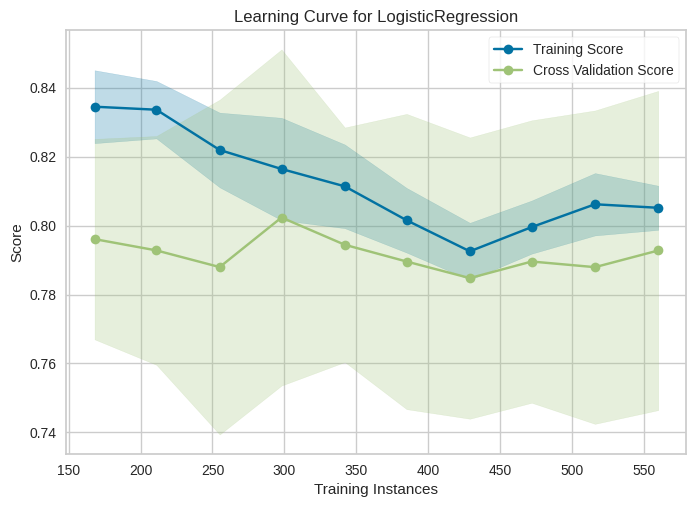

In [33]:
plot_model(estimator = tuned_model, plot = 'learning')

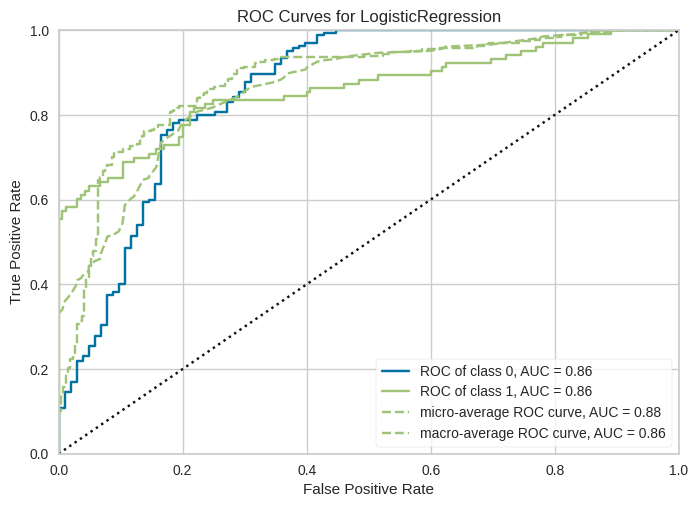

In [34]:

plot_model(estimator = tuned_model, plot = 'auc')

**The results in the second graph show that the model's success is satisfying. Let's observe it with the confusion matrix as we understand it.**

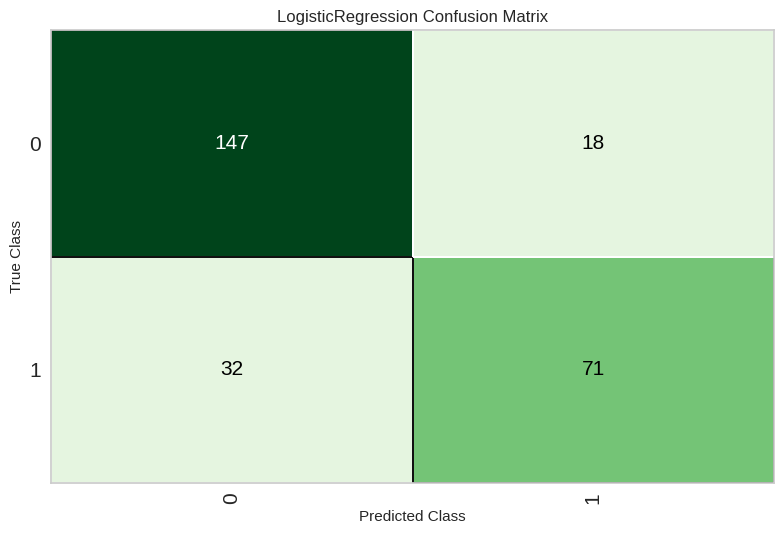

In [35]:

plot_model(estimator = tuned_model, plot = 'confusion_matrix')


**Let's see how effective the features that affect this model are on the model. The top-ranked features have more impact on the model.**


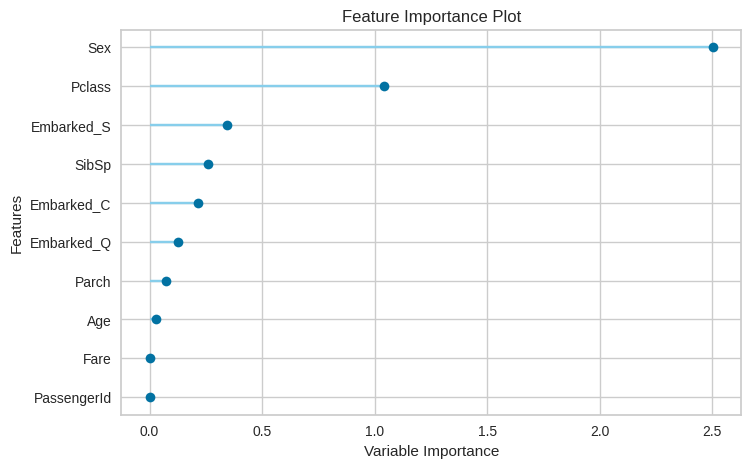

In [36]:

plot_model(estimator = tuned_model, plot = 'feature')

In [38]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1]:
#Generate prediction on test data

prediction=predict_model(best_model,data=test)
print(prediction.head())

NameError: name 'predict_model' is not defined



**You could see that two new columns namely a prediction_label and prediction_score have been added,label depicts the binary value where one represents that passengers survived and zero represents the passenger didn't survive a score depicts the probability score a strength of that prediction**



In [50]:
#Save a model
save_model(tuned_model,'lr_saved')

TypeError: 'tuple' object is not callable

In [45]:
saved_model=load_model("lr_saved")

FileNotFoundError: [Errno 2] No such file or directory: 'lr_saved.pkl'